# Prédiction de la note des vins

Le notebook compare plusieurs de modèles de régression.

In [1]:
%matplotlib inline

In [2]:
from papierstat.datasets import load_wines_dataset
df = load_wines_dataset()
X = df.drop(['quality', 'color'], axis=1)
y = yn = df['quality']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

On normalise les données.

In [4]:
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)
X_norm = normalize(X)

On récupère beaucoup de modèles implémentés dans *scikit-learn* pour la régression.

In [5]:
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.neural_network import *

models = [model for name, model in globals().items() if \
            hasattr(model, 'fit') and \
            not hasattr(model, 'predict_proba') and \
            not model.__name__.endswith('CV') and \
            'Logistic' not in model.__name__ and \
            'Regr' in model.__name__]

import pprint
pprint.pprint(models)

[<class 'sklearn.linear_model.bayes.ARDRegression'>,
 <class 'sklearn.linear_model.huber.HuberRegressor'>,
 <class 'sklearn.linear_model.base.LinearRegression'>,
 <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'>,
 <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'>,
 <class 'sklearn.linear_model.theil_sen.TheilSenRegressor'>,
 <class 'sklearn.linear_model.ransac.RANSACRegressor'>,
 <class 'sklearn.ensemble.forest.RandomForestRegressor'>,
 <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>,
 <class 'sklearn.ensemble.bagging.BaggingRegressor'>,
 <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>,
 <class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>,
 <class 'sklearn.neighbors.regression.KNeighborsRegressor'>,
 <class 'sklearn.neighbors.regression.RadiusNeighborsRegressor'>,
 <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>,
 <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>]


In [6]:
from sklearn.metrics import r2_score

def score_model(xtr, xte, ytr, yte, model):
    try:
        model.fit(xtr, ytr)
    except Exception as e:
        raise Exception("Issue with model '{0}'".format(model.__name__)) from e
    return r2_score(yte, model.predict(xte))

In [7]:
from time import clock
r2s = []
names = []
durations = []
regressors = {}
for i, model in enumerate(models):
    if model.__name__ in {'ARDRegression'}:
        continue
    begin = clock()
    reg = model()
    r2 = score_model(X_train_norm, X_test_norm, y_train, y_test, reg)
    duree = clock() - begin
    r2s.append(r2)
    names.append(model.__name__)
    durations.append(duree)
    regressors[model.__name__] = reg
    print(i, model.__name__, r2, duree)

1 HuberRegressor 0.13740749564425425 0.1212639461894014
2 LinearRegression 0.17847309585984705 0.0029795590869525768
3 PassiveAggressiveRegressor -0.04285557596309375 0.005052055370470043
4 SGDRegressor 0.003065958301639027 0.0058473155720548675


c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


5 TheilSenRegressor -0.2954535018644102 4.004470128754747
6 RANSACRegressor -6.329320133108496 0.09510411271594421
7 RandomForestRegressor 0.44941660020582086 0.6537153426750137
8 ExtraTreesRegressor 0.47202742844936785 0.20977684121680795
9 BaggingRegressor 0.44425049633525415 0.698000629729222
10 GradientBoostingRegressor 0.33397456267702474 0.7245045623758415
11 AdaBoostRegressor 0.1944862353563117 0.8850858884968602
12 KNeighborsRegressor 0.14451915120433034 0.06487395343083335
13 RadiusNeighborsRegressor -0.001180767104230318 0.6715923021340586
14 MLPRegressor 0.1908461951447743 4.355193309858805
15 MLPRegressor 0.17032733558119584 3.768823034654588


In [8]:
import pandas
df = pandas.DataFrame(dict(model=names, r2=r2s, duree=durations))
df = df[['model', 'r2', 'duree']]
df.sort_values('r2')

,model,r2,duree
5,RANSACRegressor,-6.329320,0.095104
4,TheilSenRegressor,-0.295454,4.004470
2,PassiveAggressiveRegressor,-0.042856,0.005052
12,RadiusNeighborsRegressor,-0.001181,0.671592
3,SGDRegressor,0.003066,0.005847
0,HuberRegressor,0.137407,0.121264
11,KNeighborsRegressor,0.144519,0.064874
14,MLPRegressor,0.170327,3.768823
1,LinearRegression,0.178473,0.002980
13,MLPRegressor,0.190846,4.355193


On filtre les valeurs inférieures à -1.

In [9]:
df = df[df.r2 >= -1]

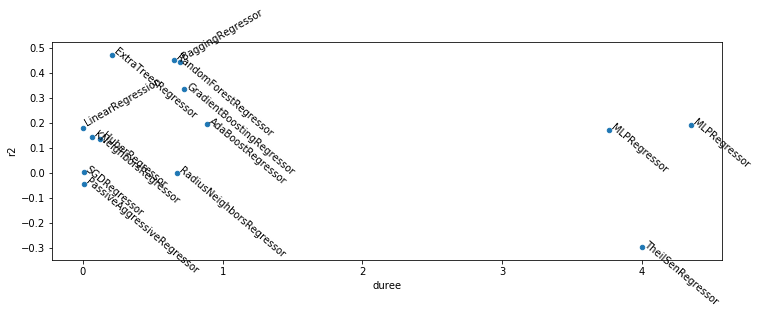

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
df.plot(x='duree', y='r2', kind="scatter", ax=ax)
for row in df.itertuples():
    t, y, x = row[1:4]
    if t[0] in {'B', 'L'}:
        ax.text(x, y, t, rotation=30, ha='left', va='bottom')
    else:
        ax.text(x, y, t, rotation=-40)

L'estimateur [RANSACRegressor](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py) produit un $R^2$ très négatif. Regardons plus en détail.

In [11]:
pred = regressors['RANSACRegressor'].predict(X_test_norm)

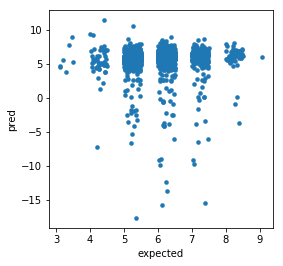

In [12]:
import numpy.random
df = pandas.DataFrame(dict(pred=pred, expected=y_test))
df['expected'] += numpy.random.random(df.shape[0]) * 0.5
df.plot(x="expected", y="pred", kind='scatter', figsize=(4, 4), linewidths=0.1);

Essayons de voir avec la densité.

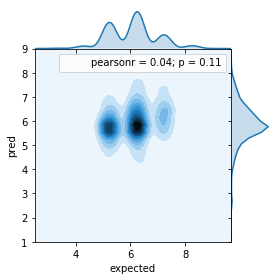

In [13]:
import seaborn
seaborn.jointplot(df["expected"], df["pred"], kind="kde", size=4, space=0, ylim=(1, 9));

Pas facile à voir. Essayons de voir autrement en triant les prédictions et les valeurs attendues par ordre.

In [14]:
sv = df.sort_values(['expected', 'pred']).reset_index(drop=True)

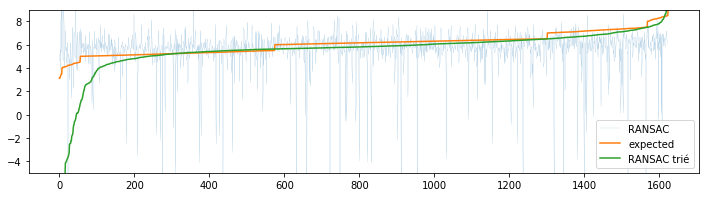

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(sv["pred"], label="RANSAC", lw=0.1)
ax.plot(list(sorted(df["expected"])), label="expected")
ax.plot(list(sorted(df["pred"])), label="RANSAC trié")
ax.set_ylim([-5, 9])
ax.legend();

Agité le modèle.

In [16]:
regressors['RANSACRegressor'].estimator_.intercept_

-52.79553731047041

Pour s'assurer que les résultats sont fiables, il faut recommencer avec une validation croisée.

In [17]:
import numpy.random
rnd = numpy.random.permutation(range(X_norm.shape[0]))
xns = X_norm[rnd, :]
yns = yn[rnd]
xns.shape, yns.shape

((6497, 11), (6497,))

In [18]:
from sklearn.model_selection import cross_val_score

def score_model_cross(xn, yn, model):
    res = cross_val_score(model, xn, yn, cv=5)
    return res.mean(), min(res), max(res)

score_model_cross(xns, yns, LinearRegression())

(0.18029706866392364, 0.1675881594013403, 0.19816409036674465)

In [19]:
r2s = []
mis = []
mas = []
names = []
durations = []
regressors = {}
for i, model in enumerate(models):
    if model.__name__ in {'ARDRegression'}:
        continue
    begin = clock()
    reg = model()
    r2, mi, ma = score_model_cross(xns, yns, reg)
    duree = clock() - begin
    r2s.append(r2)
    mis.append(mi)
    mas.append(ma)
    names.append(model.__name__)
    durations.append(duree)
    regressors[model.__name__] = reg
    print(i, model.__name__, r2, mi, ma, duree)

1 HuberRegressor 0.1594820567861547 0.14760461255042134 0.18486672937340054 0.39095473495854094
2 LinearRegression 0.18029706866392364 0.1675881594013403 0.19816409036674465 0.012534138311821152
3 PassiveAggressiveRegressor -1.50198130808252 -3.9278042449357384 0.05991265136703272 0.02377721336506511
4 SGDRegressor 0.005329772695606772 -0.00737710760424215 0.01585065549474951 0.028626601829273568


c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\Python364_x64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\Python364_x64\lib\sit

5 TheilSenRegressor -0.34553675136319884 -0.4367593994299439 -0.21421049699935502 10.253731856274499
6 RANSACRegressor -4.386115013483575 -6.661675883276972 -0.3965847958423052 0.27218679172801785
7 RandomForestRegressor 0.4298131952518108 0.39875475600186316 0.4661966974506302 1.8214409735592199
8 ExtraTreesRegressor 0.46607540201065367 0.4248781963302579 0.50699392371594 0.5815742201366447
9 BaggingRegressor 0.41891361589366305 0.3662755933083014 0.45847581549321503 1.769899974202417
10 GradientBoostingRegressor 0.3282577090704919 0.2825990388912455 0.36725194459333765 2.055176361690428
11 AdaBoostRegressor 0.19250451404457666 0.14581901482500492 0.24028314873257806 1.5819198995595798
12 KNeighborsRegressor 0.16214562476211883 0.1254688472108021 0.20677798046182294 0.10219468902141671
13 RadiusNeighborsRegressor -0.0007566611793019984 -0.002231796803592756 -8.993788931110913e-05 1.4248660837920397


c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


14 MLPRegressor 0.19078164798491787 0.1826613340311607 0.20165316192936045 12.67701058016064


c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\Python364_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


15 MLPRegressor 0.17891774474647626 0.14818678637804406 0.19028070305732903 12.607683880711193


In [20]:
df = pandas.DataFrame(dict(model=names, r2=r2s, min=mis, max=mas, duree=durations))
df = df[['model', 'r2', 'min', 'max', 'duree']]
df.sort_values('r2')

,model,r2,min,max,duree
5,RANSACRegressor,-4.386115,-6.661676,-0.396585,0.272187
2,PassiveAggressiveRegressor,-1.501981,-3.927804,0.059913,0.023777
4,TheilSenRegressor,-0.345537,-0.436759,-0.214210,10.253732
12,RadiusNeighborsRegressor,-0.000757,-0.002232,-0.000090,1.424866
3,SGDRegressor,0.005330,-0.007377,0.015851,0.028627
0,HuberRegressor,0.159482,0.147605,0.184867,0.390955
11,KNeighborsRegressor,0.162146,0.125469,0.206778,0.102195
14,MLPRegressor,0.178918,0.148187,0.190281,12.607684
1,LinearRegression,0.180297,0.167588,0.198164,0.012534
13,MLPRegressor,0.190782,0.182661,0.201653,12.677011


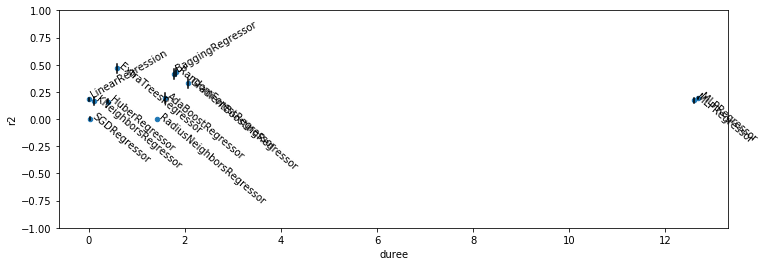

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
df[df['min'] > -0.1].plot(x='duree', y='r2', kind="scatter", ax=ax)
for row in df.itertuples():
    t, y, mi, ma, x = row[1:6]
    if mi < -0.1:
        continue
    ax.plot([x, x], [mi, ma], color="black")
    if t[0] in {'B', 'L'}:
        ax.text(x, y, t, rotation=30, ha='left', va='bottom')
    else:
        ax.text(x, y, t, rotation=-40)
ax.set_ylim([-1, 1]);